This raw data provides useful insight.They can help answer questions like:

1. What patterns can be revealed in employee turnover?
2. How long does it take to hire employees?
3. What amount of investment is needed to get employees up to a fully productive speed?
4. Which of our employees are most likely to leave within the year?
5. Are learning and development initiatives having an impact on employee performance?

# Importing libraries

In [1]:
pip install ipykernel

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly==5.20.0

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

In [7]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

# Importing Data

In [2]:
data=pd.read_csv(r"C:\Users\dinyz\Internships\Afame_Data_Analyst_Intern\2. Assignment_HR\HR Data.csv")
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# To check the null values

In [4]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Exploratory Data Analysis

# How attrition depends on age?

In [5]:
age_attrition=data.groupby(['Age','Attrition']).count()['DailyRate'].reset_index()
px.line(age_attrition,x='Age',y='DailyRate',color='Attrition',title='Agewise count of attrition')

# Is Income main factor towards employee attrition?

In [6]:
data['MonthlyIncome']=round(data['MonthlyIncome'],-3)

In [7]:
rate_attrition=data.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
rate_attrition

,MonthlyIncome,Attrition,Counts
0,1000,No,9
1,1000,Yes,10
2,2000,No,140
3,2000,Yes,67
4,3000,No,195
5,3000,Yes,51
6,4000,No,158
7,4000,Yes,19
8,5000,No,179
9,5000,Yes,25


In [8]:
px.line(rate_attrition,x='MonthlyIncome',y='Counts',color='Attrition',title='MonthlyIncome basis count of people')

# Does the department of work impact the attrition?

In [9]:
dept_attrition=data.groupby(['Department','Attrition']).count()['DailyRate'].reset_index()

In [10]:
dept_attrition

,Department,Attrition,DailyRate
0,Human Resources,No,51
1,Human Resources,Yes,12
2,Research & Development,No,828
3,Research & Development,Yes,133
4,Sales,No,354
5,Sales,Yes,92


In [11]:
px.bar(dept_attrition,x='Department',y='DailyRate',color='Attrition',title='Department wise count of people')

# How does environment satisfaction impact attrition?

In [12]:
sats_attrition=data.groupby(['EnvironmentSatisfaction','Attrition']).count()['DailyRate'].reset_index()
sats_attrition

,EnvironmentSatisfaction,Attrition,DailyRate
0,1,No,212
1,1,Yes,72
2,2,No,244
3,2,Yes,43
4,3,No,391
5,3,Yes,62
6,4,No,386
7,4,Yes,60


In [13]:
px.line(sats_attrition,x='EnvironmentSatisfaction',y='DailyRate',color='Attrition',title='Environment Satisfaction level Counts of People')

# How does self Job Satisfaction impact the Attrition?

In [14]:
jsats_attrition=data.groupby(['JobSatisfaction','Attrition']).count()['DailyRate'].reset_index()
px.area(jsats_attrition,x='JobSatisfaction',y='DailyRate',color='Attrition',title='Job Satisfaction level Counts of People')

# Does company stocks for employees impact attrition?

In [15]:
stock_attrition=data.groupby(['StockOptionLevel','Attrition']).count()['DailyRate'].reset_index()
px.bar(stock_attrition,x='StockOptionLevel',y='DailyRate',color='Attrition',title='Stock facilities level wise People')


# How does Work Life Balance impact the overall attrition rates?

In [16]:
wlb_attrition=data.groupby(['WorkLifeBalance','Attrition']).count()['DailyRate'].reset_index()
px.bar(wlb_attrition,x='WorkLifeBalance',y='DailyRate',color='Attrition',title='Work Life Balance level Counts of People')

# How does work experience affect attrition?

In [17]:
ncwrd_attrition=data.groupby(['NumCompaniesWorked','Attrition']).count()['DailyRate'].reset_index()
px.area(ncwrd_attrition,x='NumCompaniesWorked',y='DailyRate',color='Attrition',title='Work Experience level Counts of People')

# How does Work duration in current role impact Attrition?

In [18]:
yrscr_attrition=data.groupby(['YearsInCurrentRole','Attrition']).count()['DailyRate'].reset_index()
px.line(yrscr_attrition,x='YearsInCurrentRole',y='DailyRate',color='Attrition',title='Counts of People working for years')

# Does Hike percentage impact Attrition?

In [19]:
hike_attrition=data.groupby(['PercentSalaryHike','Attrition']).count()['DailyRate'].reset_index()
px.line(hike_attrition,x='PercentSalaryHike',y='DailyRate',color='Attrition',title='Count of Hike Percentages people')

# Are managers a reason of people resigning?

In [20]:
managers_attrition=data.groupby(['YearsWithCurrManager','Attrition']).count()['DailyRate'].reset_index()
px.line(managers_attrition,x='YearsWithCurrManager',y='DailyRate',color='Attrition',title='Count of people spending years with a Manager')

# By considering all the inputs predicting whether employee will resign or not?

Creating the logistic regression model

In [21]:
x=data[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y=data['Attrition'].values.ravel()

<Axes: >

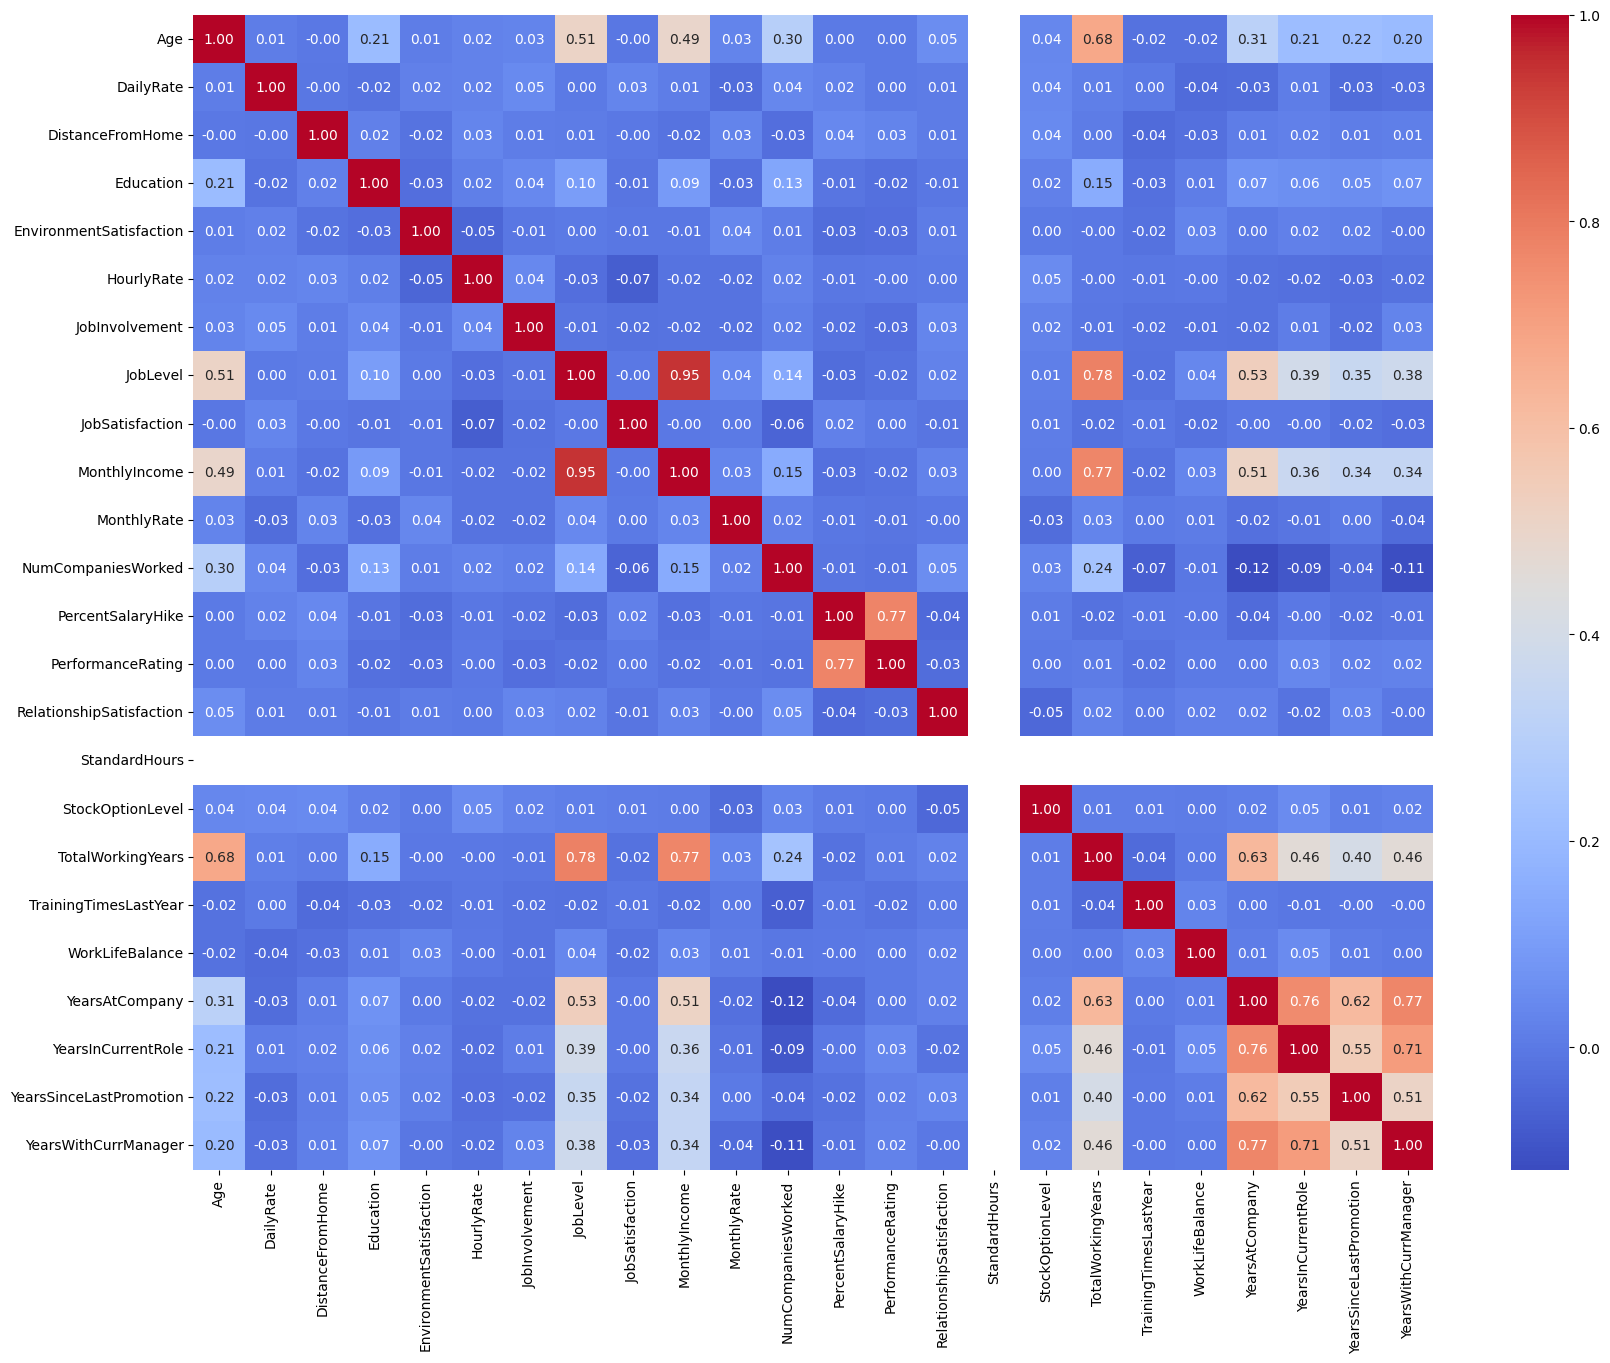

In [22]:
plt.figure(figsize=(20,15))
sns.heatmap(x.corr(),annot=True,fmt='.2f',cmap='coolwarm')

 Split the train test split

In [23]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20)

Creating the Model

In [25]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=1000,max_iter=10000)
model.fit(x_train,y_train)

LogisticRegression(C=1000, max_iter=10000)

In [26]:
print("Training model accuracy: {:.3f}".format(model.score(x_train,y_train)))
print("Test model accuracy: {:.3f}".format(model.score(x_test,y_test)))

Training model accuracy: 0.854
Test model accuracy: 0.851


# Fine tune the model to increase the accuracy

In [27]:
data_dummies=pd.get_dummies(data)
features=data_dummies[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Over18_Y',
       'OverTime_No', 'OverTime_Yes']]
x=features.values
y=data_dummies['Attrition_Yes'].values.ravel()

Split the train and test data

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20)

Scaling the data

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit(x_train,x_test)
x_train_scaled=scaled_data.transform(x_train)
x_test_scaled=scaled_data.transform(x_test)

Creating the model

In [30]:
finetuned_model=LogisticRegression(C=1000,max_iter=10000)
finetuned_model.fit(x_train_scaled,y_train)

LogisticRegression(C=1000, max_iter=10000)

In [31]:
print('Traning Model accruracy scores: {:.3f}'.format(finetuned_model.score(x_train_scaled,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(finetuned_model.score(x_test_scaled,y_test)))

Traning Model accruracy scores: 0.897
Test Model accruracy scores: 0.886
